In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your dataset
df = pd.read_csv("Advertising.csv")  # Load data
df.head()

Saving Advertising.csv to Advertising.csv


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics
df.isnull().sum()  # Count missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [4]:
df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean

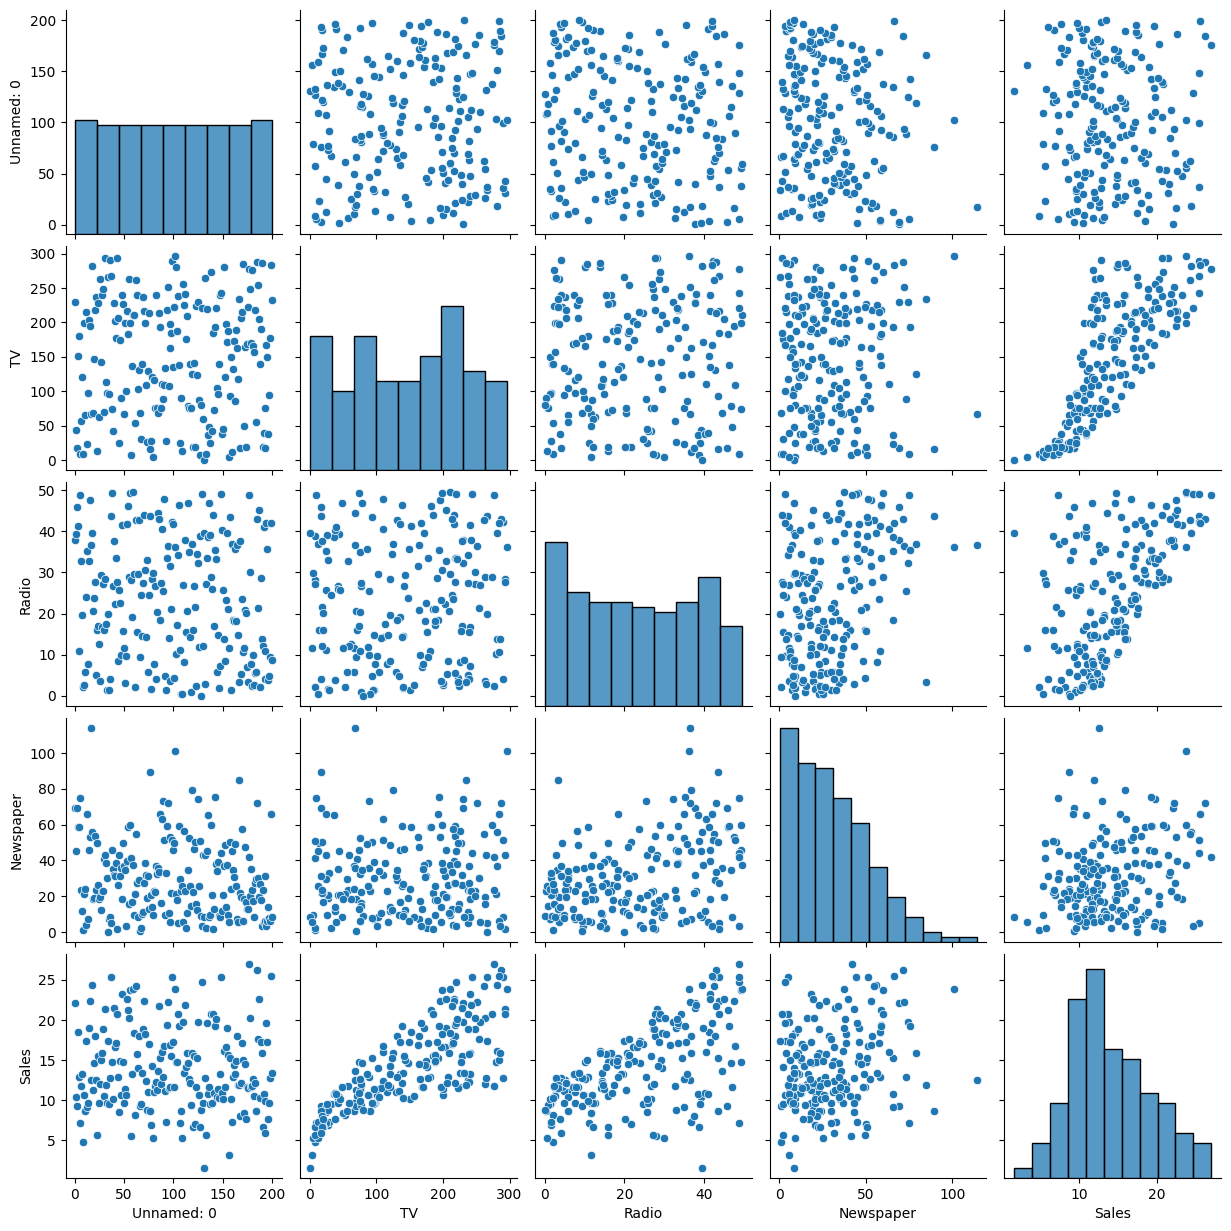

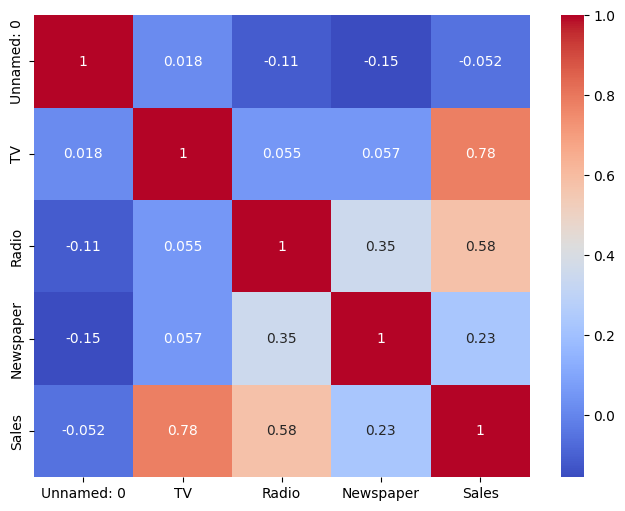

In [5]:
sns.pairplot(df)  # Pairwise relationships
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R-squared Score: 0.899438024100912


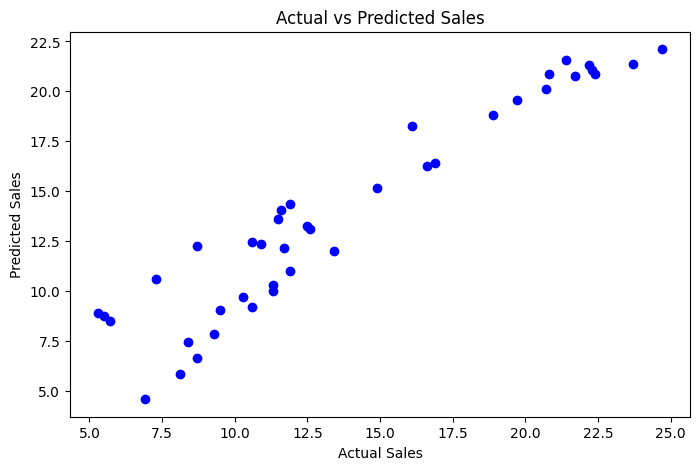

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [13]:
X['TV'] = np.log1p(X['TV'])  # Apply log transformation

<ipython-input-13-3123faeb56ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TV'] = np.log1p(X['TV'])  # Apply log transformation


In [14]:
X['TV_Radio'] = X['TV'] * X['Radio']  # Interaction term

<ipython-input-14-3e9b17010ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TV_Radio'] = X['TV'] * X['Radio']  # Interaction term


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print(f"R-squared: {r2_score(y_test, rf_y_pred)}")

R-squared: 0.9812843792541843


In [16]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

print(f"R-squared: {r2_score(y_test, svr_y_pred)}")

R-squared: 0.873080187377834


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.98581383 0.98196236 0.97688094 0.96529069 0.98346629]
Average CV Score: 0.9786828216723163


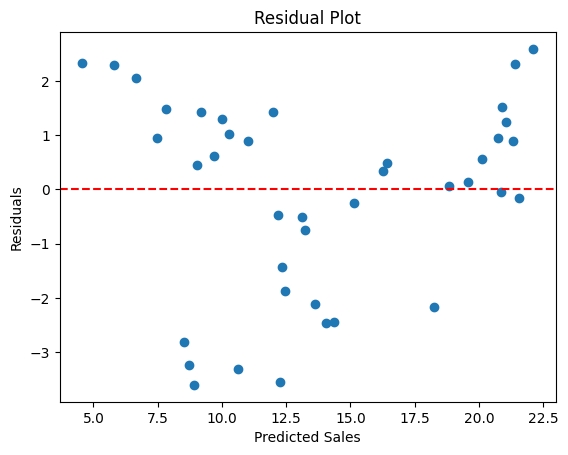

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

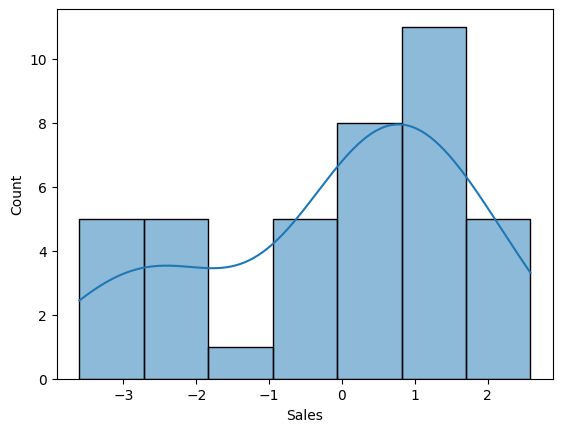

In [20]:
sns.histplot(residuals, kde=True)

In [21]:
import joblib
joblib.dump(rf_model, 'sales_predictor.pkl')

['sales_predictor.pkl']

In [22]:
import joblib
model = joblib.load('sales_predictor.pkl')

# Create a sample data point for prediction
new_data = pd.DataFrame({
    'TV': [200],  # Replace with desired TV advertising value
    'Radio': [30],  # Replace with desired Radio advertising value
    'Newspaper': [10]  # Replace with desired Newspaper advertising value
})

# Perform log transformation and create interaction term (if these were applied during training)
new_data['TV'] = np.log1p(new_data['TV'])
# Make prediction
prediction = model.predict(new_data)
print(prediction)

[4.864]


In [23]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [24]:
import streamlit as st
import joblib
import numpy as np  # Import numpy for log1p
model = joblib.load('sales_predictor.pkl')
st.title("Sales Prediction")
TV = st.slider("TV Advertising Budget", 0, 300, 100)
Radio = st.slider("Radio Advertising Budget", 0, 300, 50)
Newspaper = st.slider("Newspaper Advertising Budget", 0, 300, 25)

   # Feature Engineering
TV = np.log1p(TV)  # Apply log transformation
   # Assuming you have a 'TV_Radio' interaction term
TV_Radio = TV * Radio
if st.button("Predict Sales"):
  prediction = model.predict([[TV, Radio, Newspaper, TV_Radio]])
  st.write(f"Predicted Sales: {prediction[0]:.2f}")

2025-04-02 12:51:47.374 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.874 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-02 12:51:47.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:51:47.893 Thread 'MainThread': mi